- **52100744 - Nguyễn Thế Anh**
- **52100782 - Lê Thị Phi Du**
- **52100910 - Nguyễn Quang Lợi**

In [ ]:
# REMOVE this cell when submission
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_Final
%pwd
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_Final
 energydata_complete.csv                     US_pollution_2018_2021.csv
'House appliances energy prediction.ipynb'  'US pollution prediction from 2018 to 2023.ipynb'


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import \
    mean_absolute_error as MAE, \
    r2_score as R2, \
    mean_squared_error as MSE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data exploration and preprocessing

* **Problem Statement**: Develop a predictive model for air pollution levels in the United States. This task aims to offer valuable insights into the expected pollution levels, aiding decision-making for environmental planning, public health initiatives, and policy formulation.

* **Dataset**: "US Pollution from 2018 to 2021" comprising data on air quality with 24 features (details below).
* **Technique**: Regression

In [ ]:
filename = 'energydata_complete.csv'

# Read file and show number of rows and columns
df = pd.read_csv(filename)
df.shape

(19735, 29)

In [ ]:
# Explore the first 5 rows in the dataset
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# types and columns
types = df.dtypes
columns = list(df.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

**Variables Explaination**

| Date Time                         | Appliances (Wh)                     |
|-----------------------------------|-------------------------------------|
| Lights                            | Energy Use of Light Fixtures (Wh)   |
| T1                                | Temperature in Kitchen Area (°C)    |
| RH_1                              | Humidity in Kitchen Area (%)        |
| T2                                | Temperature in Living Room Area (°C)|
| RH_2                              | Humidity in Living Room Area (%)    |
| T3                                | Temperature in Laundry Room Area (°C)|
| RH_3                              | Humidity in Laundry Room Area (%)   |
| T4                                | Temperature in Office Room (°C)    |
| RH_4                              | Humidity in Office Room (%)         |
| T5                                | Temperature in Bathroom (°C)       |
| RH_5                              | Humidity in Bathroom (%)            |
| T6                                | Temperature Outside (North Side) (°C)|
| RH_6                              | Humidity Outside (North Side) (%)   |
| T7                                | Temperature in Ironing Room (°C)   |
| RH_7                              | Humidity in Ironing Room (%)        |
| T8                                | Temperature in Teenager Room 2 (°C)|
| RH_8                              | Humidity in Teenager Room 2 (%)     |
| T9                                | Temperature in Parents Room (°C)   |
| RH_9                              | Humidity in Parents Room (%)        |
| To                                | Temperature Outside (Chievres Weather Station) (°C)|
| Pressure (Chievres Weather Station)| mm Hg                               |
| RH_out                            | Humidity Outside (Chievres Weather Station) (%)|
| Wind Speed (Chievres Weather Station)| m/s                                |
| Visibility (Chievres Weather Station)| km                                |
| Tdewpoint (Chievres Weather Station)| °C                                |
| rv1                               | Random Variable 1 (Nondimensional)  |
| rv2                               | Random Variable 2 (Nondimensional)  |



In [ ]:
 # Check missing data exists or not
print('Number of missing data:', df.isnull().sum().sum())

# Check duplicates
print('Number of duplicated data rows:', df.duplicated().sum())

Number of missing data: 0
Number of duplicated data rows: 0


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
print('After removing duplicates:')
print('- Duplicates:', df.duplicated().sum())
print('- Data shape:', df.shape)

After removing duplicates:
- Duplicates: 0
- Data shape: (19735, 29)


In [ ]:
# Show the statistics of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


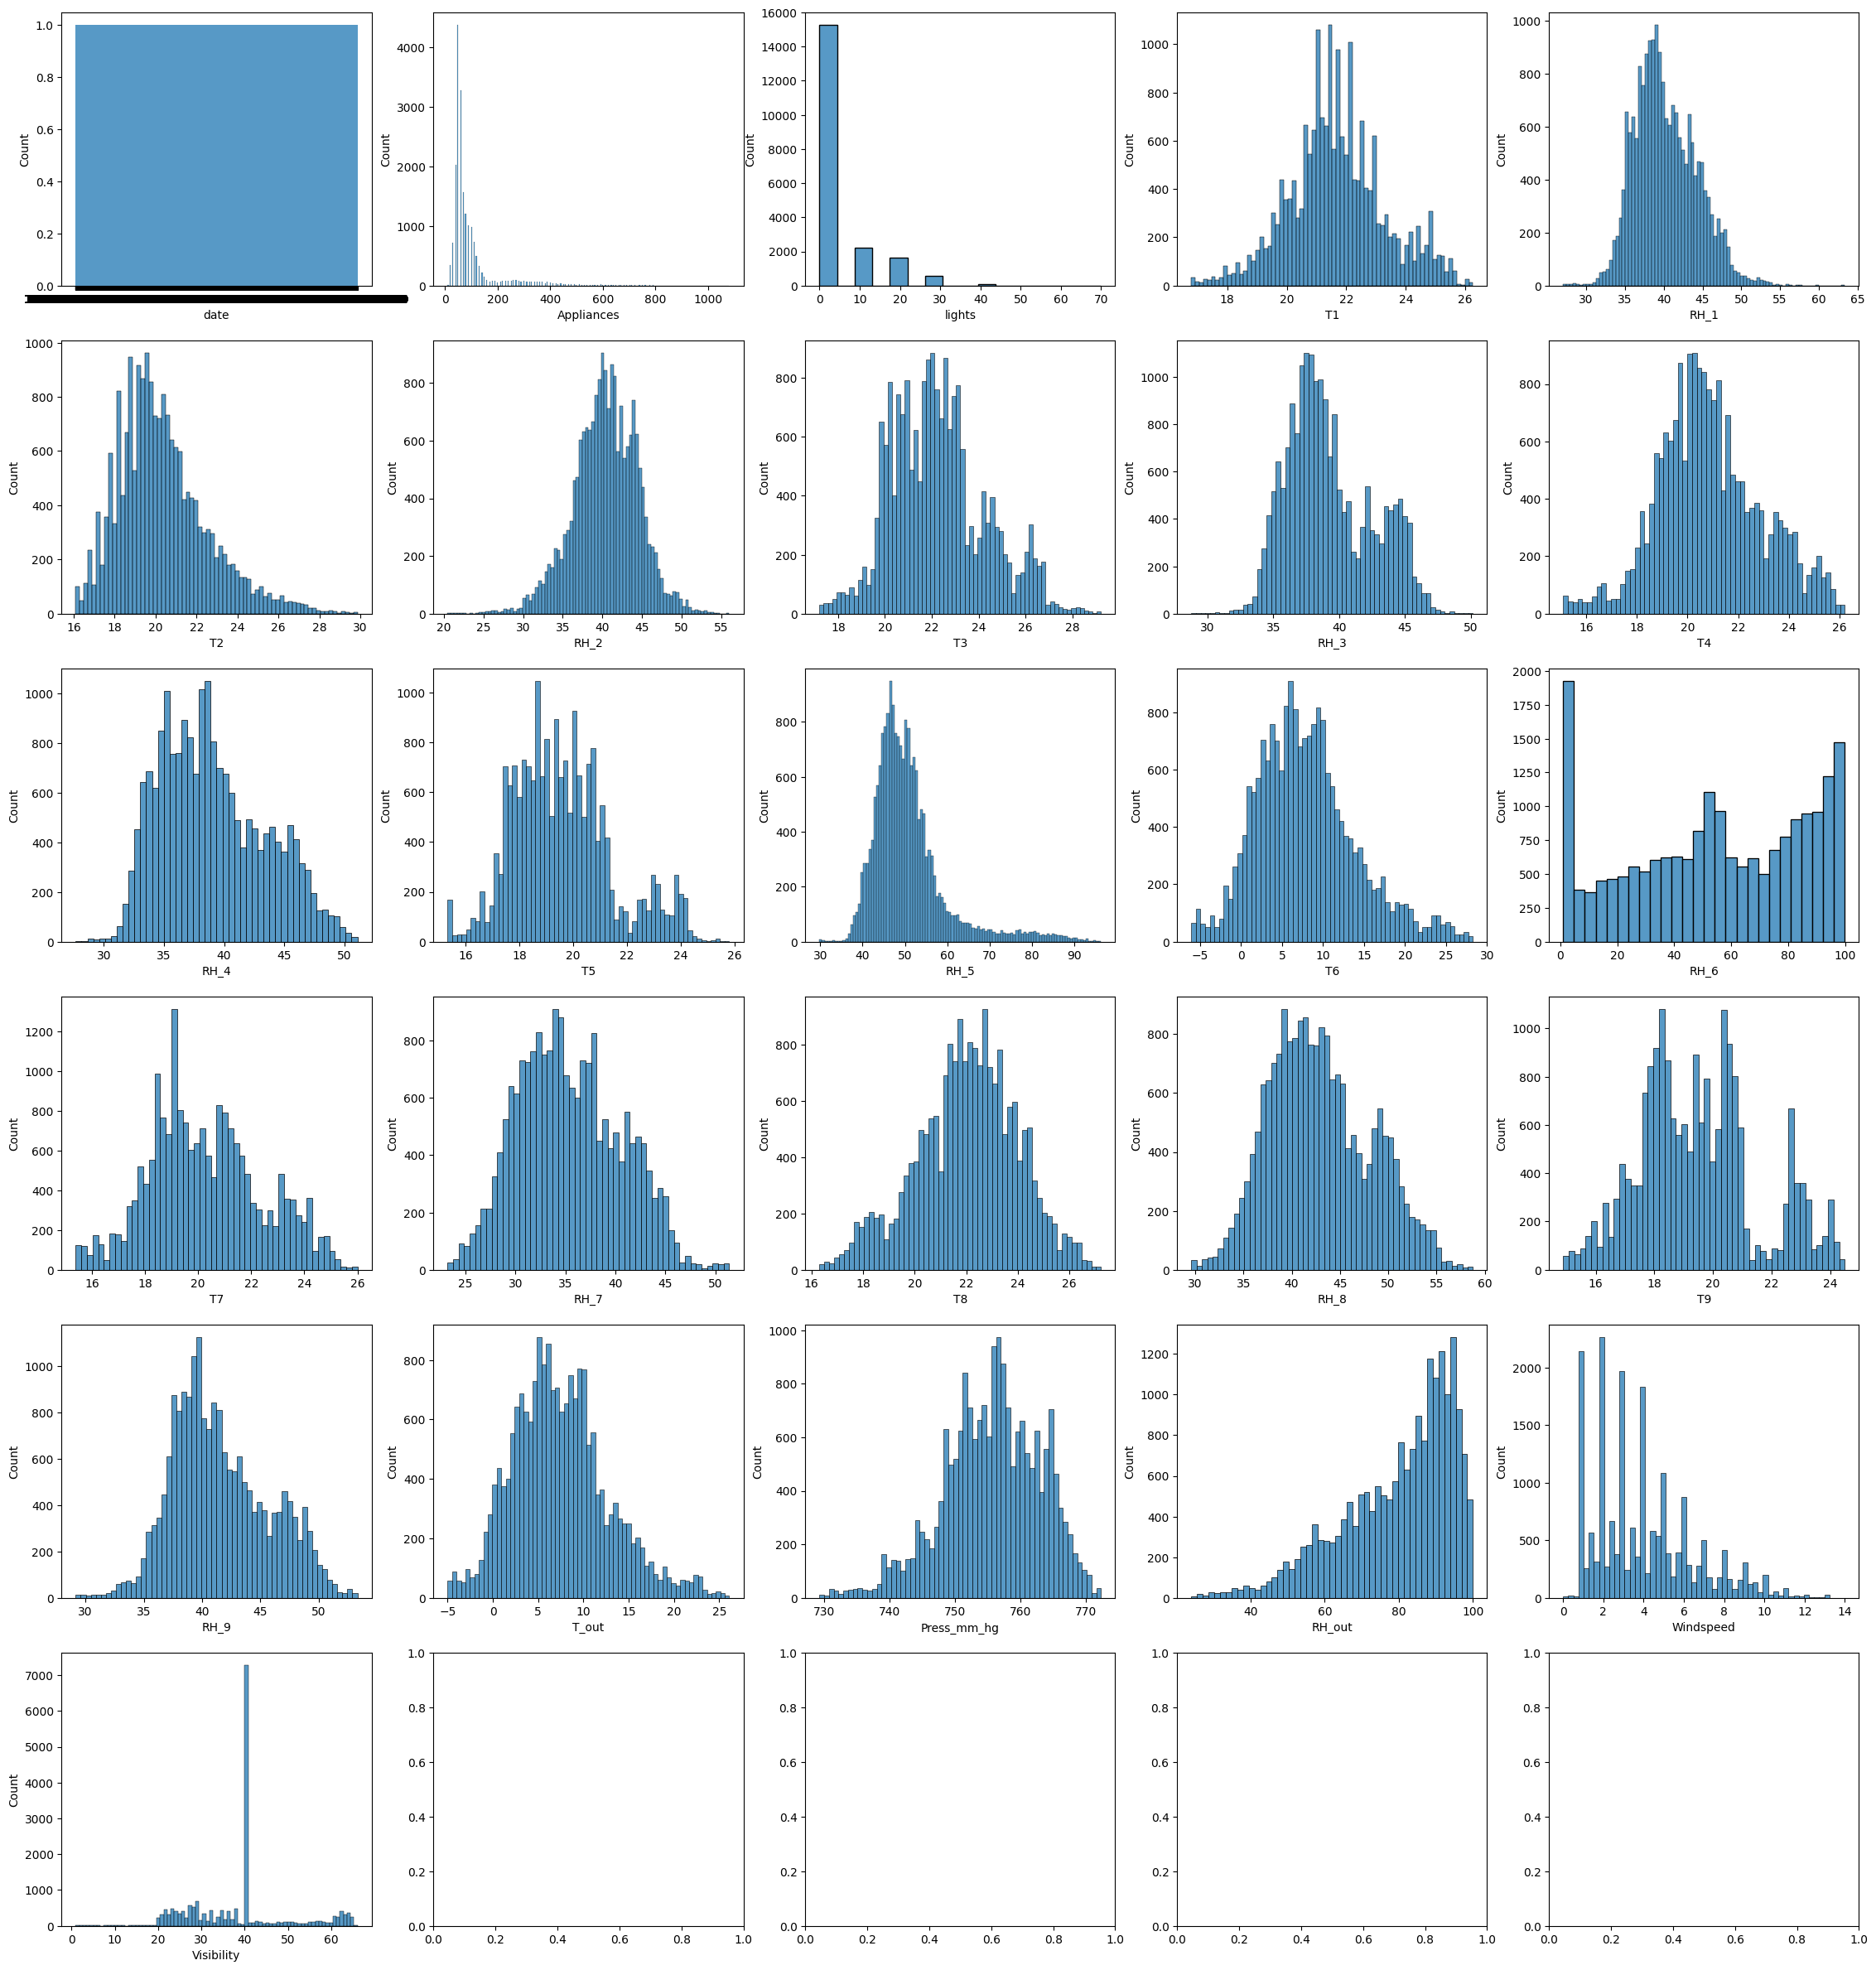

In [ ]:
df_visual = df.drop(['rv1', 'rv2'], axis=1)

# Distribution plot for each features
ls = []
colName = [j for j in df_visual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=df_visual)

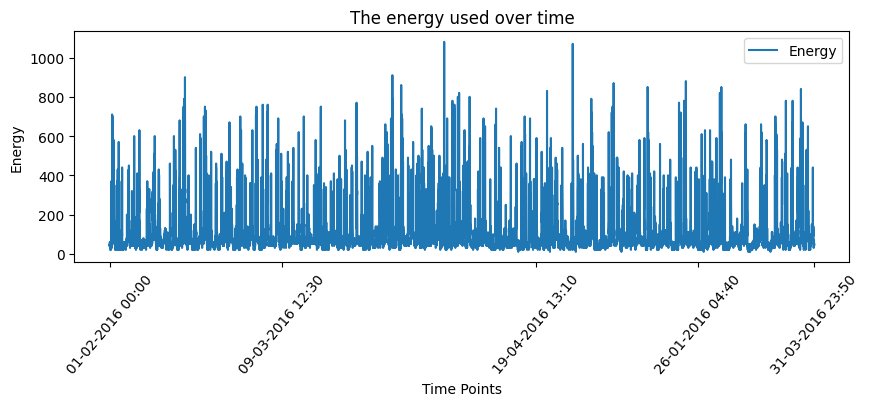

In [ ]:
# Plot energy used over time
df_sorted = df.sort_values(by='date')
plt.figure(figsize=(10, 3))

time_points = df_sorted['date'].values
energy = df_sorted['Appliances'].values

plt.plot(time_points, energy, label='Energy')
plt.xlabel('Time Points')
plt.ylabel('Energy')
plt.legend()
plt.title('The energy used over time')
selected_time_points = [time_points[0]]
selected_time_points.extend(list(np.random.choice(time_points, size=3, replace=False)))
selected_time_points.append(time_points[-1])
plt.xticks(selected_time_points, rotation=50)
plt.show()

# Data preprocessing and Features elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
df = scaler.fit_transform(df[numeric_cols])
df = pd.DataFrame(df, columns=numeric_cols)

scaler = MinMaxScaler()
df = scaler.fit_transform(df[numeric_cols])
df = pd.DataFrame(df, columns=numeric_cols)

In [ ]:
# remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

outlier = (df < (Q1 - IQR * 1.5)) |(df > (Q3 + IQR*1.5))
df = df[~outlier]
print(df.shape)
df.head()

(19735, 28)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,NaN,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,NaN,0.894737,0.500000,NaN,0.538462,0.265449,0.265449
1,0.046729,NaN,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369132,NaN,0.894737,0.476190,NaN,0.533937,0.372083,0.372083
2,0.037383,NaN,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365595,NaN,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,NaN,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,NaN,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,NaN,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357878,NaN,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
print('Number of missing data:\n', df.isnull().sum())

Number of missing data:
 Appliances     2138
lights         4483
T1              554
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out           440
Press_mm_hg     219
RH_out          239
Windspeed       214
Visibility     2522
Tdewpoint        11
rv1               0
rv2               0
dtype: int64


In [ ]:
# Handle missing values

numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

if len(numeric_columns) != 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

if len(non_numeric_columns) != 0:
    non_numeric_imputer = SimpleImputer(strategy='most_frequent')
    df[non_numeric_columns] = non_numeric_imputer\
                        .fit_transform(df[non_numeric_columns])

df.isnull().sum().sum()

0

In [ ]:
target = ['Appliances']

X = df.drop(target, axis=1)
y = df[target].values

<ipython-input-14-5b5acefa875c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


array(['T2', 'RH_9', 'RH_8', 'RH_1', 'T8', 'T9', 'Press_mm_hg', 'RH_4',
       'RH_out', 'T5', 'RH_3', 'RH_7', 'RH_6', 'T6', 'RH_2', 'T3',
       'T_out', 'RH_5', 'T4', 'T1'], dtype=object)

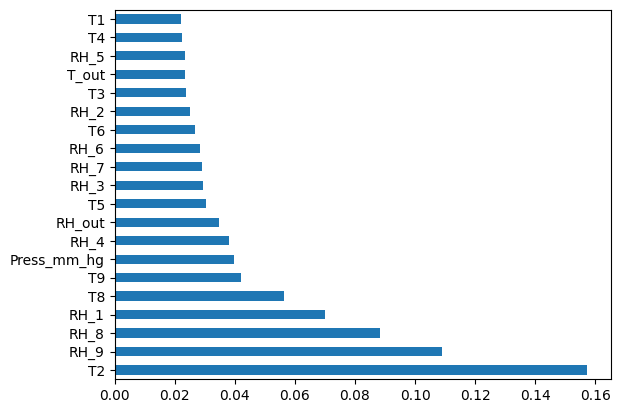

In [ ]:
from sklearn.ensemble import RandomForestRegressor

num_features_to_select = 20

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X, y)
ft_importance = pd.Series(model.feature_importances_, index=X.columns)
ft_importance.nlargest(num_features_to_select).plot(kind='barh')

feature_emb = X.columns[np.argsort(ft_importance)[::-1]]
feature_emb = np.array(feature_emb[:num_features_to_select])
feature_emb

In [ ]:
# Remove some unimportant features
df = df[feature_emb]
df.head()

,T2,RH_9,RH_8,RH_1,T8,T9,Press_mm_hg,RH_4,RH_out,T5,RH_3,RH_7,RH_6,T6,RH_2,T3,T_out,RH_5,T4,T1
0,0.225345,0.677290,0.661412,0.566187,0.173329,0.223032,0.615662,0.764262,0.894737,0.175506,0.746066,0.653428,0.841827,0.381070,0.684038,0.215188,0.372990,0.381691,0.351351,0.32735
1,0.225345,0.678532,0.660155,0.541326,0.173329,0.226500,0.615662,0.782437,0.894737,0.175506,0.748871,0.651064,0.839872,0.375443,0.682140,0.215188,0.369132,0.381691,0.351351,0.32735
2,0.225345,0.676049,0.655586,0.530502,0.173329,0.219563,0.615662,0.778062,0.894737,0.175506,0.755569,0.646572,0.830704,0.367487,0.679445,0.215188,0.365595,0.380037,0.344745,0.32735
3,0.225345,0.671909,0.650788,0.524080,0.164175,0.219563,0.615662,0.770949,0.894737,0.175506,0.758685,0.641489,0.833401,0.363800,0.678414,0.215188,0.361736,0.380037,0.341441,0.32735
4,0.225345,0.671909,0.650788,0.531419,0.164175,0.219563,0.615662,0.762697,0.894737,0.178691,0.758685,0.639362,0.848264,0.361859,0.676727,0.215188,0.357878,0.380037,0.341441,0.32735


In [ ]:
X = df.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42
)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (17761, 20)
y_train shape: (17761, 1)
X_test shape: (1974, 20)
y_test shape: (1974, 1)


# Solve the problem by using basic machine learning models

**Bagging**

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 0.004288936528604694
Mean Squared Error: 4.788649211471604e-05
R-squared Score: 0.9242452177538141

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 0.009820753606303582
Mean Squared Error: 0.00020657684378568706
R-squared Score: 0.6709177262792634


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 0.0001490360843485323
Mean Squared Error: 1.3651601895757596e-06
R-squared Score: 0.9978403635696528

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 0.009241290337629306
Mean Squared Error: 0.00023426566223370661
R-squared Score: 0.6268087198459571


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.014123599720463354
Mean Squared Error: 0.0003811655486533025
R-squared Score: 0.39700922195749433

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.014257613623906651
Mean Squared Error: 0.0003753827976963037
R-squared Score: 0.402005460448854


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))

<ipython-input-126-ea221e235954>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.003822462012366304
Mean Squared Error: 3.371348720814223e-05
R-squared Score: 0.9466664236734198

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.009447022347090968
Mean Squared Error: 0.00019249555617070033
R-squared Score: 0.6933495829207701


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
y_pred_train_knn = knn_reg.predict(X_train)

print("KNN Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_knn))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_knn))
print("R-squared Score:", r2_score(y_train, y_pred_train_knn))

print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))

KNN Regressor Metrics on Training Set:
Mean Absolute Error: 0.008447661202955693
Mean Squared Error: 0.00016546202910325717
R-squared Score: 0.7382447652523427

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 0.010078010410724076
Mean Squared Error: 0.0002173267947504531
R-squared Score: 0.6537927753842746


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)
y_pred_train_linear = linear_reg.predict(X_train)

print("Linear Regression Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_linear))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_linear))
print("R-squared Score:", r2_score(y_train, y_pred_train_linear))

print("\nLinear Regression Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))


Linear Regression Metrics on Training Set:
Mean Absolute Error: 0.01614875809322311
Mean Squared Error: 0.00047734233748107765
R-squared Score: 0.24486085248971923

Linear Regression Metrics on Test Set:
Mean Absolute Error: 0.01586700314767372
Mean Squared Error: 0.0004512440707270136
R-squared Score: 0.28115648358000844


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)

decision_tree_reg.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_train_decision_tree = decision_tree_reg.predict(X_train)

print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 4.801475484433299e-19
Mean Squared Error: 5.408240300451179e-36
R-squared Score: 1.0

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.012227066975260251
Mean Squared Error: 0.00040420103320359095
R-squared Score: 0.35609726332683544


In [ ]:
model_names = ['Bagging', 'AdaBoost','Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
mae_scores = [mean_absolute_error(y_test, y_pred_bagging),
              mean_absolute_error(y_test, y_pred_adaboost),
              mean_absolute_error(y_test, y_pred_linear),
              mean_absolute_error(y_test, y_pred_decision_tree),
              mean_absolute_error(y_test, y_pred_knn),
              mean_absolute_error(y_test, y_pred_random_forest),
              mean_absolute_error(y_test, y_pred_gradient_boost)]
mse_scores = [mean_squared_error(y_test, y_pred_bagging),
              mean_squared_error(y_test, y_pred_adaboost),
              mean_squared_error(y_test, y_pred_linear),
              mean_squared_error(y_test, y_pred_decision_tree),
              mean_squared_error(y_test, y_pred_knn),
              mean_squared_error(y_test, y_pred_random_forest),
              mean_squared_error(y_test, y_pred_gradient_boost)]
r2_scores = [r2_score(y_test, y_pred_bagging),
             r2_score(y_test, y_pred_adaboost),
             r2_score(y_test, y_pred_linear),
             r2_score(y_test, y_pred_decision_tree),
             r2_score(y_test, y_pred_knn),
             r2_score(y_test, y_pred_random_forest),
             r2_score(y_test, y_pred_gradient_boost)]

data = {
    'Model': model_names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R-squared': r2_scores
}

comparison_df = pd.DataFrame(data)
print(comparison_df)

               Model       MAE       MSE  R-squared
0            Bagging  0.009821  0.000207   0.670918
1           AdaBoost  0.009241  0.000234   0.626809
2  Linear Regression  0.015867  0.000451   0.281156
3      Decision Tree  0.012227  0.000404   0.356097
4                KNN  0.010078  0.000217   0.653793
5      Random Forest  0.009447  0.000192   0.693350
6  Gradient Boosting  0.014258  0.000375   0.402005


**Summary**

Based on the performance benchmark, the AdaBoost model appears to be the best among the evaluated models
- AdaBoost has the lowest values for both MAE and MSE, indicating high accuracy in predictions.
- AdaBoost also has the highest R-squared value, approaching 1, indicating the model's ability to explain variance in the data well.

# Solve the problem by using FFNN and LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
# Plot the training process
def plot_training_process(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Process')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

## Feed Forward Neural Network (FFNN)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=16
)

Epoch 1/20
999/999 [==============================] - 4s 3ms/step - loss: 0.0033 - val_loss: 6.1318e-04
Epoch 2/20
999/999 [==============================] - 2s 2ms/step - loss: 5.8610e-04 - val_loss: 5.3571e-04
Epoch 3/20
999/999 [==============================] - 2s 2ms/step - loss: 5.4161e-04 - val_loss: 4.9844e-04
Epoch 4/20
999/999 [==============================] - 2s 2ms/step - loss: 5.2483e-04 - val_loss: 4.9441e-04
Epoch 5/20
999/999 [==============================] - 2s 2ms/step - loss: 5.2164e-04 - val_loss: 5.1159e-04
Epoch 6/20
999/999 [==============================] - 3s 3ms/step - loss: 5.1906e-04 - val_loss: 4.8570e-04
Epoch 7/20
999/999 [==============================] - 3s 3ms/step - loss: 5.1362e-04 - val_loss: 5.3317e-04
Epoch 8/20
999/999 [==============================] - 3s 3ms/step - loss: 4.9723e-04 - val_loss: 4.9364e-04
Epoch 9/20
999/999 [==============================] - 2s 2ms/step - loss: 4.9530e-04 - val_loss: 4.8150e-04
Epoch 10/20
999/999 [===========

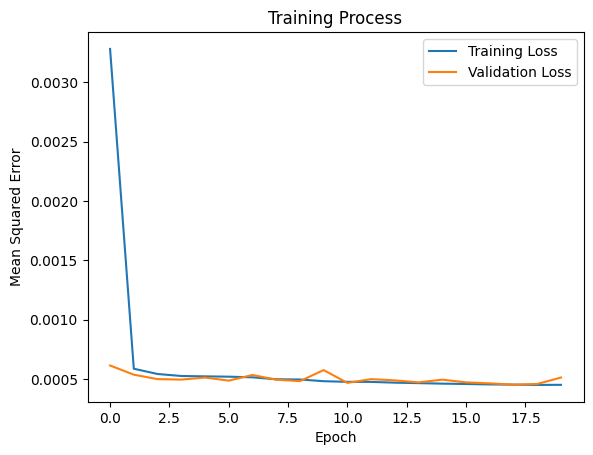

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 32)                672       
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
plot_training_process(history)
model.summary()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

62/62 [==============================] - 0s 1ms/step
Mean Squared Error: 0.0004560379002232022
Mean Absolute Error: 0.014994357758150478
R-squared Score: 0.27351978877179495


## Long Short Time Memory (LSTM)

In [ ]:
X_train.shape

(17761, 20)

In [ ]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train_reshaped.shape

(17761, 1, 20)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mean_squared_error')
history = model.fit(
    X_train_reshaped, y_train,
    validation_split = 0.1,
    epochs=20,
    batch_size=32
)

Epoch 1/20
500/500 [==============================] - 16s 11ms/step - loss: 5.8270e-04 - val_loss: 5.3456e-04
Epoch 2/20
500/500 [==============================] - 5s 9ms/step - loss: 5.0741e-04 - val_loss: 5.3630e-04
Epoch 3/20
500/500 [==============================] - 5s 10ms/step - loss: 5.0002e-04 - val_loss: 5.0159e-04
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 4.9309e-04 - val_loss: 4.7777e-04
Epoch 5/20
500/500 [==============================] - 4s 8ms/step - loss: 4.8195e-04 - val_loss: 5.1910e-04
Epoch 6/20
500/500 [==============================] - 5s 11ms/step - loss: 4.7523e-04 - val_loss: 4.6313e-04
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 4.6688e-04 - val_loss: 4.6850e-04
Epoch 8/20
500/500 [==============================] - 4s 8ms/step - loss: 4.5783e-04 - val_loss: 4.9916e-04
Epoch 9/20
500/500 [==============================] - 5s 9ms/step - loss: 4.5718e-04 - val_loss: 4.6062e-04
Epoch 10/20
500/500 [===

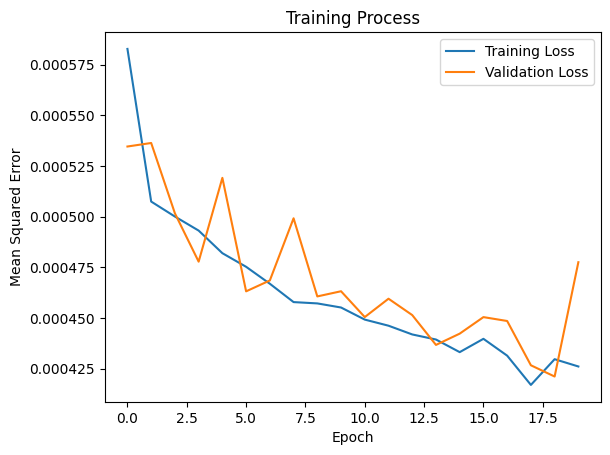

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 64)             21760     
                                                                 
 lstm_15 (LSTM)              (None, 1, 16)             5184      
                                                                 
 lstm_16 (LSTM)              (None, 1, 32)             6272      
                                                                 
 lstm_17 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 34537 (134.91 KB)
Trainable params: 34537 (134.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
plot_training_process(history)
model.summary()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_reshaped).flatten()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

62/62 [==============================] - 3s 4ms/step
Mean Squared Error: 0.000447970309781867
Mean Absolute Error: 0.0168283854462675
R-squared Score: 0.28637166973400296


# Apply techniques to avoid Overfitting in the models


**Bagging**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=200, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 0.015412496414063084
Mean Squared Error: 0.0004437347458653525
R-squared Score: 0.2980269056340801

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 0.015542942993355322
Mean Squared Error: 0.0004363484883694637
R-squared Score: 0.3048855328809188


**AdaBoost**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 0.01757730999594301
Mean Squared Error: 0.00047078583250778644
R-squared Score: 0.25523301767897255

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 0.017766485791856697
Mean Squared Error: 0.0004765420143850058
R-squared Score: 0.24085620274084507


**Gradient Boosting**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
gradient_boost_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.011692505035762225
Mean Squared Error: 0.00026775074726247426
R-squared Score: 0.5764275339581827

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.012411059892399694
Mean Squared Error: 0.0002981007173060665
R-squared Score: 0.5251178203175748


**Random Forest**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))


<ipython-input-145-3cb87a08b41e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.010905610944654934
Mean Squared Error: 0.00024067893022539406
R-squared Score: 0.619254216684069

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.01192967068568984
Mean Squared Error: 0.0002788375237533989
R-squared Score: 0.5558045876108686


**KNN**

Hyperparameter Tuning, Cross-Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning to find optimal n_neighbors
param_grid = {'n_neighbors': range(3, 11)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)
knn_reg = grid_search.best_estimator_

# Cross-validation to evaluate model generalization
scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='r2')
#print("Cross-validation R-squared scores:", scores)

# Train the model on the entire training set
knn_reg.fit(X_train, y_train)

# Evaluate on test set
y_pred_knn = knn_reg.predict(X_test)
print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))


{'n_neighbors': 4}

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 0.00974531588765503
Mean Squared Error: 0.0002139403519892194
R-squared Score: 0.6591874665958805


**Linear Regression**

Hyperparameter tuning with regularization

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE

# Hyperparameter tuning with regularization
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)  # Using Ridge regression
grid_search.fit(X_train, y_train)
linear_reg = grid_search.best_estimator_

# Feature selection with RFE
rfe = RFE(linear_reg, n_features_to_select=10)  # Adjust n_features_to_select
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the model on selected features
linear_reg.fit(X_train_selected, y_train)

# Evaluate on test set
y_pred_linear = linear_reg.predict(X_test_selected)
print("\nLinear Regression Metrics on Test Set (After Overfitting Prevention):")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))



Linear Regression Metrics on Test Set (After Overfitting Prevention):
Mean Absolute Error: 0.015949174669882448
Mean Squared Error: 0.00045595171512066447
R-squared Score: 0.27365708387701704


**Decision Tree**

Define the parameter grid

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree regressor with the best parameters
best_decision_tree_reg = DecisionTreeRegressor(**best_params, random_state=42)

best_decision_tree_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_pred_train_decision_tree = best_decision_tree_reg.predict(X_train)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 0.014638941816834073
Mean Squared Error: 0.00041591058616663077
R-squared Score: 0.3420437685546365

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.015225793764994448
Mean Squared Error: 0.00043895757105588
R-squared Score: 0.30072919644438156


Feed Forward Neural Network (FFNN)

Use Early Stopping, Dropout techniques

Epoch 1/200
500/500 [==============================] - 6s 9ms/step - loss: 0.0020 - val_loss: 6.0022e-04
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 6.0706e-04 - val_loss: 5.8522e-04
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 5.8769e-04 - val_loss: 5.5640e-04
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 5.6733e-04 - val_loss: 5.3755e-04
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 5.5084e-04 - val_loss: 5.1645e-04
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 5.4900e-04 - val_loss: 4.9894e-04
Epoch 7/200
500/500 [==============================] - 1s 2ms/step - loss: 5.4122e-04 - val_loss: 4.9725e-04
Epoch 8/200
500/500 [==============================] - 1s 2ms/step - loss: 5.3978e-04 - val_loss: 5.7649e-04
Epoch 9/200
500/500 [==============================] - 1s 2ms/step - loss: 5.4313e-04 - val_loss: 5.2022e-04
Epoch 10/200
500/500 [=

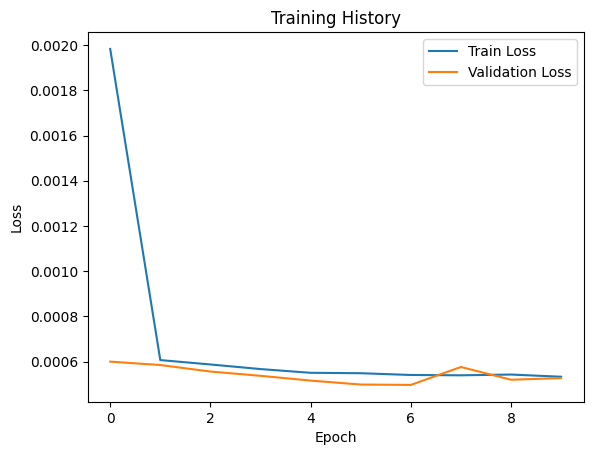

62/62 [==============================] - 0s 1ms/step
Mean Squared Error: 0.0005005775542982865
R-squared Score: 0.20256696383189066


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Long Short Time Memory (LSTM)

Use Early Stopping, Dropout techniques

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add Dropout
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping]
)

y_pred = model.predict(X_test_reshaped).flatten()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Epoch 1/200
999/999 [==============================] - 14s 9ms/step - loss: 5.9629e-04 - val_loss: 5.3564e-04
Epoch 2/200
999/999 [==============================] - 6s 6ms/step - loss: 5.3571e-04 - val_loss: 5.1220e-04
Epoch 3/200
999/999 [==============================] - 8s 8ms/step - loss: 5.2821e-04 - val_loss: 5.1535e-04
Epoch 4/200
999/999 [==============================] - 6s 6ms/step - loss: 5.1281e-04 - val_loss: 5.0353e-04
Epoch 5/200
999/999 [==============================] - 7s 7ms/step - loss: 5.0682e-04 - val_loss: 6.4324e-04
Epoch 6/200
999/999 [==============================] - 7s 7ms/step - loss: 5.0129e-04 - val_loss: 4.8947e-04
Epoch 7/200
999/999 [==============================] - 6s 6ms/step - loss: 4.9832e-04 - val_loss: 4.8620e-04
Epoch 8/200
999/999 [==============================] - 7s 7ms/step - loss: 4.8785e-04 - val_loss: 4.6849e-04
Epoch 9/200
999/999 [==============================] - 6s 6ms/step - loss: 4.8789e-04 - val_loss: 5.1355e-04
Epoch 10/200
999/9

# Methods to Improve Prediction Model Accuracy

### 1. Tuning Hyperparameters

Adjusting the model's parameters to optimize performance. For example:
- Changing the number of trees in a RandomForest model.
- Increasing LSTM layers and adjusting the learning rate in a Neural Network model.

### 2. Feature Engineering

Creating or selecting better features can enhance the model. This includes:
- Removing or adding new features.
- Feature combination.
- Handling missing data.
- Using better encoding techniques for classification data.

### 3. Cross-Validation

Using cross-validation to evaluate the model on various data portions and prevent overfitting.

### 4. Ensemble Learning

Combining multiple predictive models to create a stronger one. For instance: Bagging, Boosting, Stacking.

### 5. Regularization

Using regularization techniques like L1 or L2 regularization to prevent overfitting and enhance the model's generalization.

### 6. Early Stopping

Halting the training process when there isn't significant improvement on the validation set to prevent overfitting.

### 7. Handling Missing Data

Dealing with missing data sensibly instead of discarding it or filling it with average values.

### 8. Feature Scaling

Scaling features can enhance the model's performance, especially with models like KNN, Neural Networks.

### 9. Adding Data

If possible, adding new data or expanding the dataset can improve the model's predictive ability.

Each improvement step can be applied to specific problems and datasets, often requiring experimentation and evaluation to determine the most effective approach for your model.


# Conclusion

The methods outlined for improving the accuracy of predictive models have been integrated during model execution. Enhancing the predictive accuracy of a model brings about several significant benefits.

- Firstly, it elevates the model's performance, ensuring more accurate predictions on new data and reducing errors, thereby increasing confidence in prediction outcomes.

- Secondly, heightened accuracy fosters greater reliability—users and stakeholders place more trust in a model as its accuracy improves, making the model more transparent and comprehensible in its decisions.

- Thirdly, improving accuracy aids in optimizing data utilization, saving time and costs while providing a clearer assessment of the model's quality. Ultimately, enhancing accuracy not only boosts predictive efficiency but also facilitates more effective communication, encouraging continual model development by advancing the knowledge and skills of the development team.

